In [1]:
import sys
sys.path.append('../')
sys.path.append('../../')




In [2]:
# implement data collection procedure on the RTBGym environment

# import OFRL modules
import ofrl
from rtbgym import RTBEnv, CustomizedRTBEnv
from basicgym import BasicEnv
from ofrl.dataset import SyntheticDataset
from ofrl.policy import OnlineHead, ContinuousEvalHead
from ofrl.policy import ContinuousTruncatedGaussianHead as TruncatedGaussianHead
from ofrl.ope.online import (
    calc_on_policy_policy_value,
    visualize_on_policy_policy_value,
)
from ofrl.utils import MinMaxScaler, MinMaxActionScaler

# import d3rlpy algorithms
from d3rlpy.algos import RandomPolicy
# from d3rlpy.preprocessing import MinMaxScaler, MinMaxActionScaler
from ofrl.utils import MinMaxScaler, MinMaxActionScaler

# import from other libraries
import gym
import torch
from sklearn.model_selection import train_test_split
from pathlib import Path

#import from function
from function.data_collection import data_collection
from function.policy_learning_behavior import policy_learning_behavior
from function.evaluation_policy import select_evaluation_policy

from experiments.main import train_behavior_policy
from experiments.main import obtain_logged_dataset
from experiments.main import train_candidate_policies
from experiments.main import off_policy_evaluation


ImportError: cannot import name 'TimeLimit' from 'gym' (/Users/ren/.pyenv/versions/3.10.6/lib/python3.10/site-packages/gym/__init__.py)

In [ ]:
import pickle
from glob import glob
from tqdm import tqdm

import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# log directory
from pathlib import Path
Path("logs/").mkdir(exist_ok=True)

In [ ]:
# # standardized environment for discrete action
env = gym.make("BasicEnv-continuous-v0")
# # for api compatibility to d3rlpy
from ofrl.utils import OldGymAPIWrapper
env_ = OldGymAPIWrapper(env)
# # behavior policy
from d3rlpy.algos import SAC
from d3rlpy.models.encoders import VectorEncoderFactory
from d3rlpy.models.q_functions import MeanQFunctionFactory
from d3rlpy.online.buffers import ReplayBuffer

# # model
# sac = SAC(
#     actor_encoder_factory=VectorEncoderFactory(hidden_units=[30, 30]),
#     critic_encoder_factory=VectorEncoderFactory(hidden_units=[30, 30]),
#     q_func_factory=MeanQFunctionFactory(),
#     use_gpu=torch.cuda.is_available(),
#     action_scaler=MinMaxActionScaler(
#         minimum=env_.action_space.low,   # 0.1
#         maximum=env_.action_space.high,  # 10
#     ),
# )
# # setup replay buffer
# buffer = ReplayBuffer(
#     maxlen=10000,
#     env=env_,
# )

In [ ]:
# # start training
# # skip if there is a pre-trained model
# sac.fit_online(
#     env_,
#     buffer,
#     eval_env=env_,
#     n_steps=1000,
#     n_steps_per_epoch=10,
#     update_start_step=10,
#     # n_steps=100000,
#     # n_steps_per_epoch=1000,
#     # update_start_step=1000,
# )
# # save model
# sac.save_model("d3rlpy_logs/sac.pt")
# # reload model
# sac.build_with_env(env_)
# sac.load_model("d3rlpy_logs/sac.pt")

In [ ]:
from d3rlpy.dataset import MDPDataset
from d3rlpy.algos import CQL

In [ ]:
# import ope modules from OFRL
from ofrl.ope import CreateOPEInput
from ofrl.ope import OffPolicyEvaluation as OPE
# basic estimators
from ofrl.ope import ContinuousDirectMethod as DM
from ofrl.ope import ContinuousTrajectoryWiseImportanceSampling as TIS
from ofrl.ope import ContinuousPerDecisionImportanceSampling as PDIS
from ofrl.ope import ContinuousDoublyRobust as DR
# self normalized estimators
from ofrl.ope import ContinuousSelfNormalizedTrajectoryWiseImportanceSampling as SNTIS
from ofrl.ope import ContinuousSelfNormalizedPerDecisionImportanceSampling as SNPDIS
from ofrl.ope import ContinuousSelfNormalizedDoublyRobust as SNDR
# marginal estimators
from ofrl.ope import ContinuousStateActionMarginalImportanceSampling as SAMIS
from ofrl.ope import ContinuousStateActionMarginalDoublyRobust as SAMDR
from ofrl.ope import ContinuousStateMarginalImportanceSampling as SMIS
from ofrl.ope import ContinuousStateMarginalDoublyRobust as SMDR
from ofrl.ope import ContinuousStateActionMarginalSelfNormalizedImportanceSampling as SAMSNIS
from ofrl.ope import ContinuousStateActionMarginalSelfNormalizedDoublyRobust as SAMSNDR
from ofrl.ope import ContinuousStateMarginalSelfNormalizedImportanceSampling as SMSNIS
from ofrl.ope import ContinuousStateMarginalSelfNormalizedDoublyRobust as SMSNDR
# double reinforcement learning estimators
from ofrl.ope import ContinuousDoubleReinforcementLearning as DRL

In [ ]:
basic_estimators = [DM(), TIS(), PDIS(), DR(), SNTIS(), SNPDIS(), SNDR()]
state_marginal_estimators = [SMIS(), SMDR(), SMSNIS(), SMSNDR()]
state_action_marginal_estimators = [SAMIS(), SAMDR(), SAMSNIS(), SAMSNDR()]
drl_estimators = [DRL()]
all_estimators = basic_estimators + state_marginal_estimators + state_action_marginal_estimators + drl_estimators

basic_estimators_name = ["dm", "tis", "pdis", "dr", "sntis", "snpdis", "sndr"]
state_marginal_estimators_name = ["sm_is", "sm_dr", "sm_snis", "sm_sndr"]
state_action_marginal_estimators_name = ["sam_is", "sam_dr", "sam_snis", "sam_sndr"]
drl_estimators_name = ["drl"]

In [ ]:
# n_trajectories_list = [100, 200, 400]
n_trajectories_list = [100, 200, 400, 800, 1600]
# n_trajectories_list = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200]
# random_state_list = [10, 20, 30]
random_state_list = [100, 200, 300]
# random_state_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bias_df_list = []
variance_df_list = []
mse_df_list = []


In [ ]:
n_random_state = 2

In [ ]:

for n_trajectories in n_trajectories_list:
    cql_data = DataFrame()
    sac_data = DataFrame()
    for random_state in random_state_list:
        env_name="BasicEnv-continuous-v0"
        env = gym.make(env_name)
    
        behavior_policy = train_behavior_policy(
            env_name=env_name,
            env=env,
            behavior_sigma=behavior_sigma,
            behavior_tau=behavior_tau,
            device=device,
            base_random_state=base_random_state,
            log_dir=log_dir,
        )

        train_logged_dataset, test_logged_dataset = data_collection(
            env,
            behavior_policy,
            n_trajectories,
            n_random_state,
            random_state,
        )

        evaluation_policy = select_evaluation_policy(
            env,
            train_logged_dataset,
            random_state,
        )
        
        # first, prepare OPE inputs
        prep = CreateOPEInput(
            env=env,
            model_args={
                "fqe": {
                    "encoder_factory": VectorEncoderFactory(hidden_units=[30, 30]),
                    "q_func_factory": MeanQFunctionFactory(),
                    "learning_rate": 1e-4,
                    "use_gpu": torch.cuda.is_available(),
                },
            },
            state_scaler=MinMaxScaler(
                minimum=test_logged_dataset["state"].min(axis=0),
                maximum=test_logged_dataset["state"].max(axis=0),
            ),
            action_scaler=MinMaxActionScaler(
                minimum=env.action_space.low,  # minimum value that policy can take
                maximum=env.action_space.high,  # maximum value that policy can take
            ),
            gamma=0.95,
            sigma=0.1,
            device="cuda:0" if torch.cuda.is_available() else "cpu",
        )

        # takes time
        input_dict = prep.obtain_whole_inputs(
            logged_dataset=test_logged_dataset,
            evaluation_policies=evaluation_policy,
            require_value_prediction=True,
            require_weight_prediction=True,
            n_trajectories_on_policy_evaluation=100,
            random_state=random_state,
        )

        # with open("logs/ope_input_dict_continuous_zoo.pkl", "wb") as f:
        # pickle.dump(input_dict, f)

        # with open("logs/ope_input_dict_continuous_zoo.pkl", "rb") as f:
        # input_dict = pickle.load(f)

        ope = OPE(
            logged_dataset=test_logged_dataset,
            ope_estimators=all_estimators,
            action_scaler=MinMaxActionScaler(
                minimum=env.action_space.low,  # minimum value that policy can take
                maximum=env.action_space.high,  # maximum value that policy can take
            ),
            sigma=0.1,
        )

        policy_value_dict = ope.estimate_policy_value(
            input_dict=input_dict,
        )
        
        tmp_cql = DataFrame(policy_value_dict)['cql']
        cql_data = pd.concat([cql_data, tmp_cql], axis=1)
        # tmp_sac = DataFrame(policy_value_dict)['sac']
        # sac_data = pd.concat([sac_data, tmp_sac], axis=1)
        
        
    # bias = abs(sac_data.mean(axis=1) - sac_data.mean(axis=1)['on_policy'])
    # variance = sac_data.var(axis=1)
    bias = abs(cql_data.mean(axis=1) - cql_data.mean(axis=1)['on_policy'])
    variance = cql_data.var(axis=1)
    mse = bias**2 + variance

    bias_df = DataFrame(DataFrame(bias).stack())\
        .reset_index(1).rename(columns={"level_1": "est", 0: "bias"})
    bias_df["n_trajectories"] = n_trajectories
    bias_df_list.append(bias_df)
    variance_df = DataFrame(DataFrame(variance).stack())\
        .reset_index(1).rename(columns={"level_1": "est", 0: "variance"})
    variance_df["n_trajectories"] = n_trajectories
    variance_df_list.append(variance_df)
    mse_df = DataFrame(DataFrame(mse).stack())\
        .reset_index(1).rename(columns={"level_1": "est", 0: "mse"})
    mse_df["n_trajectories"] = n_trajectories
    mse_df_list.append(mse_df)


    # bias_df[n_trajectories] = bias
    # variance_df[n_trajectories] = variance

# aggregate all results 
bias_result_df = pd.concat(bias_df_list).reset_index(level=0)
variance_result_df = pd.concat(variance_df_list).reset_index(level=0)
mse_result_df = pd.concat(mse_df_list).reset_index(level=0)

In [ ]:

for n_trajectories in n_trajectories_list:
    cql_data = DataFrame()
    sac_data = DataFrame()
    for random_state in random_state_list:
        env_name="BasicEnv-continuous-v0"
        env = gym.make(env_name)
    
        behavior_policy = train_behavior_policy(
            env_name=env_name,
            env=env,
            behavior_sigma=behavior_sigma,
            behavior_tau=behavior_tau,
            device=device,
            base_random_state=base_random_state,
            log_dir=log_dir,
        )

        train_logged_dataset, test_logged_dataset = data_collection(
            env,
            behavior_policy,
            n_trajectories,
            n_random_state,
            random_state,
        )

        evaluation_policy = select_evaluation_policy(
            env,
            train_logged_dataset,
            random_state,
        )
        
        # first, prepare OPE inputs
        prep = CreateOPEInput(
            env=env,
            model_args={
                "fqe": {
                    "encoder_factory": VectorEncoderFactory(hidden_units=[30, 30]),
                    "q_func_factory": MeanQFunctionFactory(),
                    "learning_rate": 1e-4,
                    "use_gpu": torch.cuda.is_available(),
                },
            },
            state_scaler=MinMaxScaler(
                minimum=test_logged_dataset["state"].min(axis=0),
                maximum=test_logged_dataset["state"].max(axis=0),
            ),
            action_scaler=MinMaxActionScaler(
                minimum=env.action_space.low,  # minimum value that policy can take
                maximum=env.action_space.high,  # maximum value that policy can take
            ),
            gamma=0.95,
            sigma=0.1,
            device="cuda:0" if torch.cuda.is_available() else "cpu",
        )

        # takes time
        input_dict = prep.obtain_whole_inputs(
            logged_dataset=test_logged_dataset,
            evaluation_policies=evaluation_policy,
            require_value_prediction=True,
            require_weight_prediction=True,
            n_trajectories_on_policy_evaluation=100,
            random_state=random_state,
        )

        # with open("logs/ope_input_dict_continuous_zoo.pkl", "wb") as f:
        # pickle.dump(input_dict, f)

        # with open("logs/ope_input_dict_continuous_zoo.pkl", "rb") as f:
        # input_dict = pickle.load(f)

        ope = OPE(
            logged_dataset=test_logged_dataset,
            ope_estimators=all_estimators,
            action_scaler=MinMaxActionScaler(
                minimum=env.action_space.low,  # minimum value that policy can take
                maximum=env.action_space.high,  # maximum value that policy can take
            ),
            sigma=0.1,
        )

        policy_value_dict = ope.estimate_policy_value(
            input_dict=input_dict,
        )
        
        tmp_cql = DataFrame(policy_value_dict)['cql']
        cql_data = pd.concat([cql_data, tmp_cql], axis=1)
        # tmp_sac = DataFrame(policy_value_dict)['sac']
        # sac_data = pd.concat([sac_data, tmp_sac], axis=1)
        
        
    # bias = abs(sac_data.mean(axis=1) - sac_data.mean(axis=1)['on_policy'])
    # variance = sac_data.var(axis=1)
    bias = abs(cql_data.mean(axis=1) - cql_data.mean(axis=1)['on_policy'])
    variance = cql_data.var(axis=1)
    mse = bias**2 + variance

    bias_df = DataFrame(DataFrame(bias).stack())\
        .reset_index(1).rename(columns={"level_1": "est", 0: "bias"})
    bias_df["n_trajectories"] = n_trajectories
    bias_df_list.append(bias_df)
    variance_df = DataFrame(DataFrame(variance).stack())\
        .reset_index(1).rename(columns={"level_1": "est", 0: "variance"})
    variance_df["n_trajectories"] = n_trajectories
    variance_df_list.append(variance_df)
    mse_df = DataFrame(DataFrame(mse).stack())\
        .reset_index(1).rename(columns={"level_1": "est", 0: "mse"})
    mse_df["n_trajectories"] = n_trajectories
    mse_df_list.append(mse_df)


    # bias_df[n_trajectories] = bias
    # variance_df[n_trajectories] = variance

# aggregate all results 
bias_result_df = pd.concat(bias_df_list).reset_index(level=0)
variance_result_df = pd.concat(variance_df_list).reset_index(level=0)
mse_result_df = pd.concat(mse_df_list).reset_index(level=0)

2023-04-05 14:40.31 [info     ] Directory is created at d3rlpy_logs/SAC_online_20230405144031
2023-04-05 14:40.31 [debug    ] Fitting action scaler...       action_scler=min_max
2023-04-05 14:40.31 [debug    ] Building model...
2023-04-05 14:40.31 [debug    ] Model has been built.
2023-04-05 14:40.31 [info     ] Parameters are saved to d3rlpy_logs/SAC_online_20230405144031/params.json params={'action_scaler': {'type': 'min_max', 'params': {'minimum': array([-1., -1., -1.]), 'maximum': array([1., 1., 1.])}}, 'actor_encoder_factory': {'type': 'vector', 'params': {'hidden_units': [30, 30], 'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None, 'use_dense': False}}, 'actor_learning_rate': 0.0003, 'actor_optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'batch_size': 256, 'critic_encoder_factory': {'type': 'vector', 'params': {'hidden_units': [30, 30], 'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': 

  0%|          | 0/1000 [00:00<?, ?it/s]

2023-04-05 14:40.31 [info     ] Model parameters are saved to d3rlpy_logs/SAC_online_20230405144031/model_100.pt
2023-04-05 14:40.31 [info     ] SAC_online_20230405144031: epoch=1 step=100 epoch=1 metrics={'time_inference': 0.0003380441665649414, 'time_environment_step': 3.6962032318115235e-05, 'time_step': 0.0003864908218383789, 'rollout_return': 0.33922628511358666, 'evaluation': 1.4517608076655322} step=100
2023-04-05 14:40.31 [info     ] Model parameters are saved to d3rlpy_logs/SAC_online_20230405144031/model_200.pt
2023-04-05 14:40.31 [info     ] SAC_online_20230405144031: epoch=2 step=200 epoch=2 metrics={'time_inference': 0.0002836775779724121, 'time_environment_step': 3.515481948852539e-05, 'time_step': 0.0003320193290710449, 'rollout_return': 0.4631901484547347, 'evaluation': 1.3092997220721188} step=200
2023-04-05 14:40.32 [info     ] Model parameters are saved to d3rlpy_logs/SAC_online_20230405144031/model_300.pt
2023-04-05 14:40.32 [info     ] SAC_online_20230405144031: ep

OSError: [Errno 63] File name too long: "train_dataset_<OrderEnforcing<PassiveEnvChecker<BasicEnv<BasicEnv-continuous-v0>>>>_ContinuousTruncatedGaussianHead(base_policy=d3rlpy.algos.sac.SAC(action_scaler=ofrl.utils.MinMaxActionScaler(minimum=[-1. -1. -1.], maximum=[1. 1. 1.]), actor_encoder_factory=d3rlpy.models.encoders.VectorEncoderFactory(hidden_units=[30, 30], activation='relu', use_batch_norm=False, dropout_rate=None, use_dense=False), actor_learning_rate=0.0003, actor_optim_factory=d3rlpy.models.optimizers.AdamFactory(optim_cls='Adam', betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False), batch_size=256, critic_encoder_factory=d3rlpy.models.encoders.VectorEncoderFactory(hidden_units=[30, 30], activation='relu', use_batch_norm=False, dropout_rate=None, use_dense=False), critic_learning_rate=0.0003, critic_optim_factory=d3rlpy.models.optimizers.AdamFactory(optim_cls='Adam', betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False), gamma=0.99, generated_maxlen=100000, impl=<d3rlpy.algos.torch.sac_impl.SACImpl object at 0x1037ab760>, initial_temperature=1.0, n_critics=2, n_frames=1, n_steps=1, q_func_factory=d3rlpy.models.q_functions.MeanQFunctionFactory(share_encoder=False), real_ratio=1.0, reward_scaler=None, scaler=None, tau=0.005, temp_learning_rate=0.0003, temp_optim_factory=d3rlpy.models.optimizers.AdamFactory(optim_cls='Adam', betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False), use_gpu=None), name='sac', sigma=array([1.]), minimum=array([-1., -1., -1.]), maximum=array([1., 1., 1.]), random_state=100)_100_2_100.pickle"

In [ ]:
variance_result_df.query("(index == 'dm')")

,index,est,variance,n_trajectories
1,dm,0,0.005272,100
18,dm,0,0.006663,200
35,dm,0,0.006865,400
52,dm,0,0.007357,800
69,dm,0,0.006313,1600


In [ ]:
bias_result_df


,index,est,bias,n_trajectories
0,on_policy,0,0.000000,100
1,dm,0,0.582070,100
2,tis,0,22.114200,100
3,pdis,0,87836.477714,100
4,dr,0,75178.137665,100
...,...,...,...,...
80,sam_is,0,0.434703,1600
81,sam_dr,0,0.266604,1600
82,sam_snis,0,2.551075,1600
83,sam_sndr,0,1.700218,1600


In [ ]:
import pickle

In [ ]:
with open("logs/cql_variance_result_df.pkl", "wb") as f:
    pickle.dump(variance_result_df, f)

with open("logs/cql_variance_result_df.pkl", "rb") as f:
    variance_result_df = pickle.load(f)

with open("logs/cql_bias_result_df.pkl", "wb") as f:
    pickle.dump(bias_result_df, f)

with open("logs/cql_bias_result_df.pkl", "rb") as f:
    bias_result_df = pickle.load(f)

with open("logs/cql_mse_result_df.pkl", "wb") as f:
    pickle.dump(mse_result_df, f)

with open("logs/cql_mse_result_df.pkl", "rb") as f:
    mse_result_df = pickle.load(f)

/var/folders/48/ly7vft814qv_x6krlfw5s8_c0000gn/T/ipykernel_56617/865407317.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


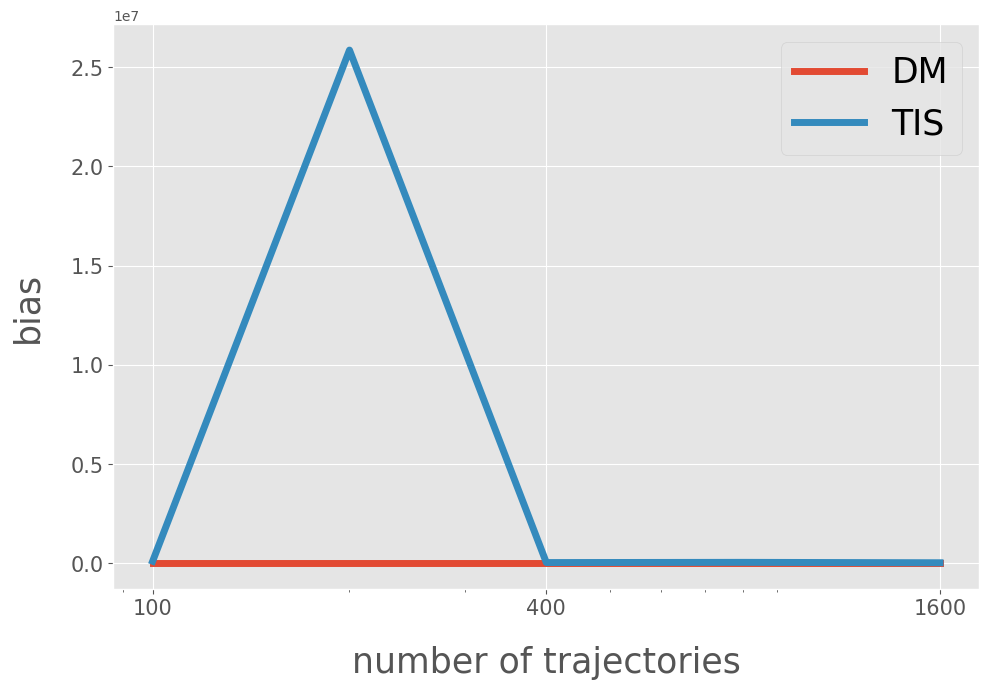

In [ ]:
# figure configs
# query = "(est == 'DM' or est == 'IPS') and num_data <= 6400"
xlabels = [100, 400, 1600]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 7), tight_layout=True)
sns.lineplot(
    linewidth=5,
    dashes=False,
    legend=False,
    x="n_trajectories",
    y="bias",
    hue="index",
    ax=ax,
    data=bias_result_df.query("(index == 'dm' or index == 'pdis')"),
    ci=None,
)
# title and legend
ax.legend(["DM", "TIS"], loc="upper right", fontsize=25)
# yaxis
# ax.set_yscale("log")
ax.set_ylabel("bias", fontsize=25)
ax.tick_params(axis="y", labelsize=15)
ax.yaxis.set_label_coords(-0.08, 0.5)
# xaxis
ax.set_xscale("log")
ax.set_xlabel("number of trajectories", fontsize=25)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, fontsize=15)
ax.xaxis.set_label_coords(0.5, -0.1)

/var/folders/48/ly7vft814qv_x6krlfw5s8_c0000gn/T/ipykernel_56617/132179728.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


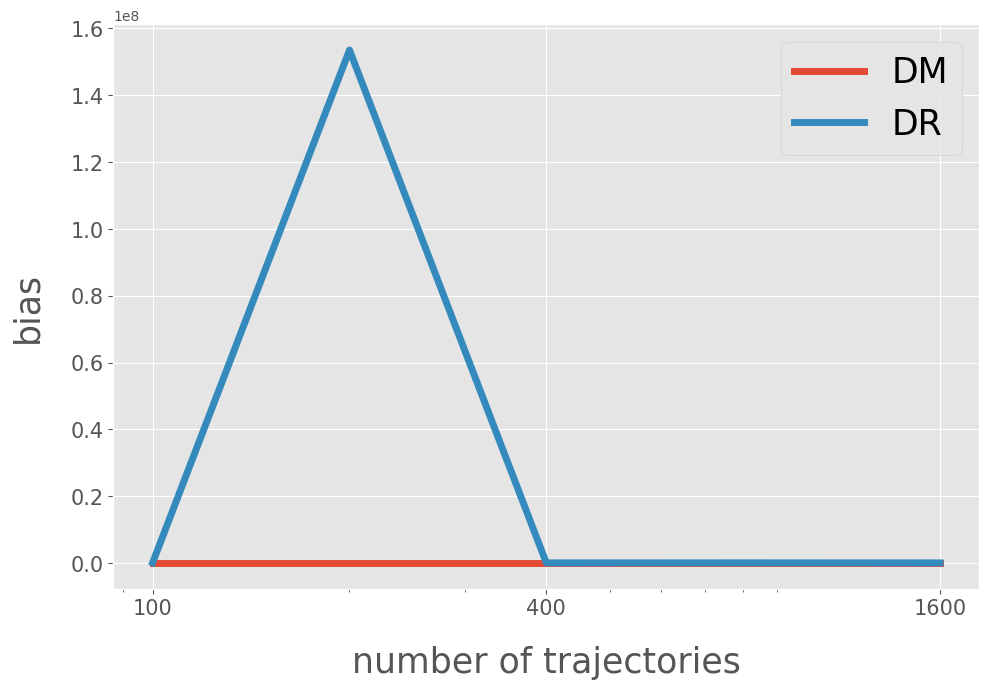

In [ ]:
# figure configs
# query = "(est == 'DM' or est == 'IPS') and num_data <= 6400"
xlabels = [100, 400, 1600]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 7), tight_layout=True)
sns.lineplot(
    linewidth=5,
    dashes=False,
    legend=False,
    x="n_trajectories",
    y="bias",
    hue="index",
    ax=ax,
    data=bias_result_df.query("(index == 'dm' or index == 'dr')"),
    ci=None,
)
# title and legend
ax.legend(["DM", "DR"], loc="upper right", fontsize=25)
# yaxis
# ax.set_yscale("log")
ax.set_ylabel("bias", fontsize=25)
ax.tick_params(axis="y", labelsize=15)
ax.yaxis.set_label_coords(-0.08, 0.5)
# xaxis
ax.set_xscale("log")
ax.set_xlabel("number of trajectories", fontsize=25)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, fontsize=15)
ax.xaxis.set_label_coords(0.5, -0.1)

In [ ]:
variance_result_df

,index,est,variance,n_trajectories
0,on_policy,0,3.416206e-01,100
1,dm,0,5.272162e-03,100
2,tis,0,1.266919e+03,100
3,pdis,0,2.314449e+10,100
4,dr,0,1.695435e+10,100
...,...,...,...,...
80,sam_is,0,2.862559e-11,1600
81,sam_dr,0,6.312751e-03,1600
82,sam_snis,0,6.386891e+00,1600
83,sam_sndr,0,4.656570e+00,1600


/var/folders/48/ly7vft814qv_x6krlfw5s8_c0000gn/T/ipykernel_56617/1079444482.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


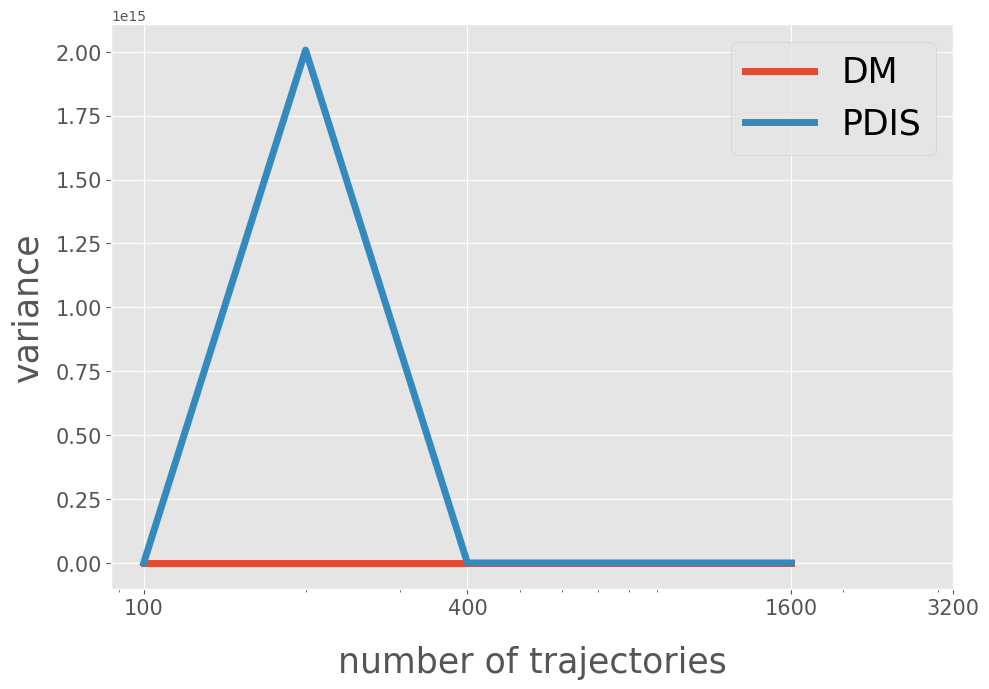

In [ ]:
# figure configs
# query = "(est == 'DM' or est == 'IPS') and num_data <= 6400"
xlabels = [100, 400, 1600, 3200]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 7), tight_layout=True)
sns.lineplot(
    linewidth=5,
    dashes=False,
    legend=False,
    x="n_trajectories",
    y="variance",
    hue="index",
    ax=ax,
    data=variance_result_df.query("(index == 'dm' or index == 'pdis')"),
    ci=None,
)
# title and legend
ax.legend(["DM", "PDIS"], loc="upper right", fontsize=25)
# yaxis
# ax.set_yscale("log")
ax.set_ylabel("variance", fontsize=25)
ax.tick_params(axis="y", labelsize=15)
ax.yaxis.set_label_coords(-0.08, 0.5)
# xaxis
ax.set_xscale("log")
ax.set_xlabel("number of trajectories", fontsize=25)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, fontsize=15)
ax.xaxis.set_label_coords(0.5, -0.1)

/var/folders/48/ly7vft814qv_x6krlfw5s8_c0000gn/T/ipykernel_56617/1525150744.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


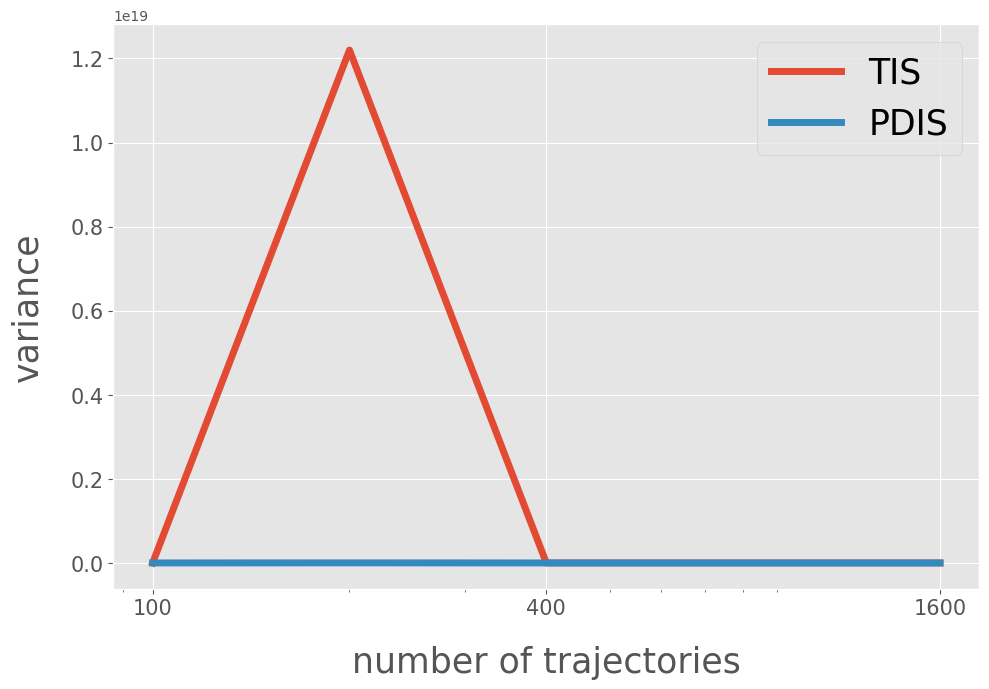

In [ ]:
# figure configs
# query = "(est == 'DM' or est == 'IPS') and num_data <= 6400"
xlabels = [100, 400, 1600]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 7), tight_layout=True)
sns.lineplot(
    linewidth=5,
    dashes=False,
    legend=False,
    x="n_trajectories",
    y="variance",
    hue="index",
    ax=ax,
    data=variance_result_df.query("(index == 'tis' or index == 'pdis')"),
    ci=None,
)
# title and legend
ax.legend(["TIS", "PDIS"], loc="upper right", fontsize=25)
# yaxis
# ax.set_yscale("log")
ax.set_ylabel("variance", fontsize=25)
ax.tick_params(axis="y", labelsize=15)
ax.yaxis.set_label_coords(-0.08, 0.5)
# xaxis
ax.set_xscale("log")
ax.set_xlabel("number of trajectories", fontsize=25)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, fontsize=15)
ax.xaxis.set_label_coords(0.5, -0.1)

/var/folders/48/ly7vft814qv_x6krlfw5s8_c0000gn/T/ipykernel_56617/3324735909.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


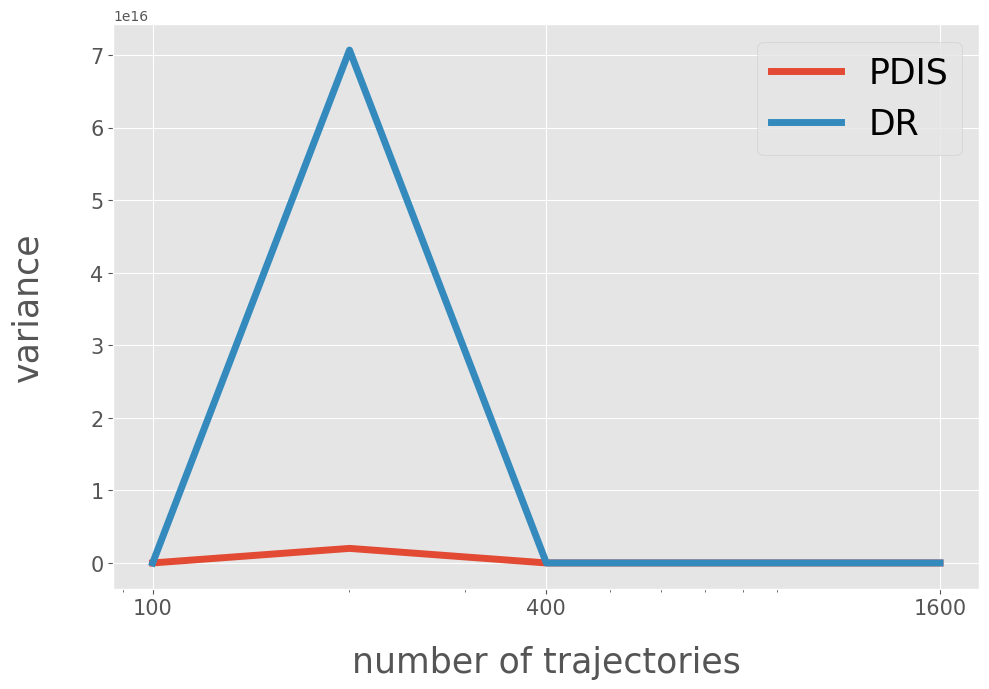

In [ ]:
# figure configs
# query = "(est == 'DM' or est == 'IPS') and num_data <= 6400"
xlabels = [100, 400, 1600]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 7), tight_layout=True)
sns.lineplot(
    linewidth=5,
    dashes=False,
    legend=False,
    x="n_trajectories",
    y="variance",
    hue="index",
    ax=ax,
    data=variance_result_df.query("(index == 'pdis' or index == 'dr')"),
    ci=None,
)
# title and legend
ax.legend(["PDIS", "DR"], loc="upper right", fontsize=25)
# yaxis
# ax.set_yscale("log")
ax.set_ylabel("variance", fontsize=25)
ax.tick_params(axis="y", labelsize=15)
ax.yaxis.set_label_coords(-0.08, 0.5)
# xaxis
ax.set_xscale("log")
ax.set_xlabel("number of trajectories", fontsize=25)
ax.set_xticks(xlabels)
ax.set_xticklabels(xlabels, fontsize=15)
ax.xaxis.set_label_coords(0.5, -0.1)